## Exploratory Data Analysis
Mark Lee 

Summary:  
This section is primarily where I tinkered with the data to see what I was working with and to determine variables of interest. One interesting thing to note was that certain values of **Age**, **HoursPerWeek**, and **TotalHours** were missing from the dataset. Primarily, they were missing in all of the highest ranked players, with some TotalHours and/or HoursPerWeek missing from LeagueIndex 5 individuals. I chose to remove the 5 individuals with missing values, as we have plenty of other LeagueIndex 5. For LeagueIndex 8, I ommitted them from Age, HoursPerWeek, and TotalHours analyses and attempted to see if the associations were still the same for the rest of the variables. 

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import load_data

spd = load_data.load_everything()
# basic imports + loading data file 
# removing GameID 5255 and 1064 for having missing data
print(spd.shape)
spd.head()

(3395, 20)


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.718,0.0035151591,0.0002196974,7,0.0001098487,0.0003923169,0.0048490365,32.6677,40.8673,4.7508,28,0.0013966,6,0,0
1,55,5,23.0,10.0,5000.0,129.2322,0.0033038124,0.0002594617,4,0.0002940566,0.0004324362,0.0043070643,32.9194,42.3454,4.8434,22,0.0011935,5,0,0.00020757
2,56,4,30.0,10.0,200.0,69.9612,0.0011010906,0.0003355705,4,0.0002936242,0.0004614094,0.002925755,44.6475,75.3548,4.043,22,0.00074455,6,0,0.00018876
3,57,3,19.0,20.0,400.0,107.6016,0.0010335422,0.0002131015,1,0.0000532753697310659,0.0005434088,0.0037825513,29.2203,53.7352,4.9155,19,0.0004262,7,0,0.00038358
4,58,3,32.0,10.0,500.0,122.8908,0.0011360136,0.0003273259,2,0,0.0013285582,0.0023682994,22.6885,62.0813,9.374,15,0.0011745,4,0,0.000019254


### Distribution of Data

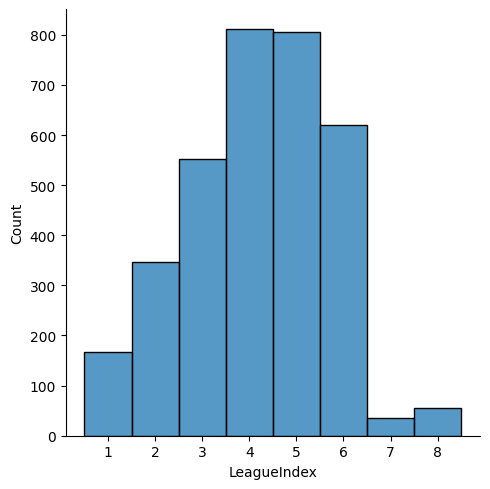

In [8]:
sns.displot(spd, x = "LeagueIndex")

### Data Heatmap


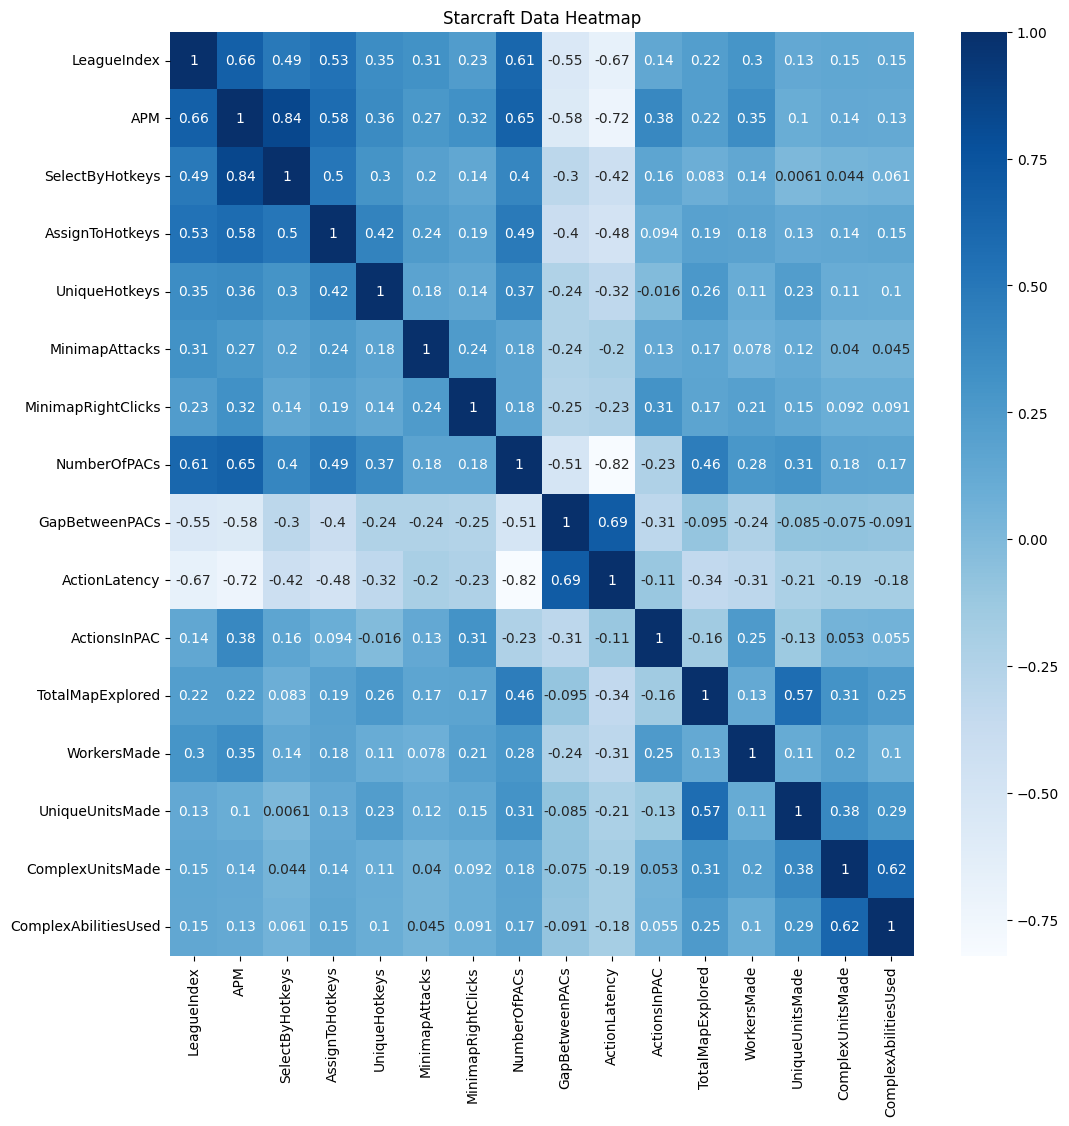

In [7]:
spd_heatmap = spd.drop(['GameID','Age','HoursPerWeek','TotalHours'], axis = 1)
corr = spd_heatmap.corr()
fig, ax = plt.subplots(figsize=(12,12))         
ax = sns.heatmap(corr, cmap='Blues', annot = True, fmt = '.2g')
plt.title("Starcraft Data Heatmap")
plt.show()


I removed GameID, Age, TotalHours, and HoursPerWeek from the heatmap due to GameID being a unique ID irrelevant to rank and the latter features not being present for the highest ranks not being present.     
The important part is seeing the correlations between the LeagueIndex and the rest of the features. Additionally, I am making note of any other features being highly correlated to see if an interaction term could be necessary.   
In order to see the importance of Age, HoursPerWeek, and TotalHours, I will be temporarily removing the highest rank (LeagueIndex = 8) to see if there is any relationships amongst the other ranks.  
#### Age, TotalHours, and HoursPerWeek Analyses  
Upon creating box and whisker plots for the aforementioned features, it was revealed that there were a good amount of outliers, sepcifically in the TotalHours area. To combat this, I took a median summary of each LeagueIndex, and this gave a better picture that median Age is similar across all ranks, HoursPerWeek only increase greatly at the higher Indices, and TotalHours has a gradual increase as the LeagueIndex increases. In short, the latter two features have a good chance of identifying the LeagueIndex, and I will have try to incorporate them even though they are missing from all LeagueIndex 8s. Additionally, it helps with filling in the missing data in the starcraft dataset. 

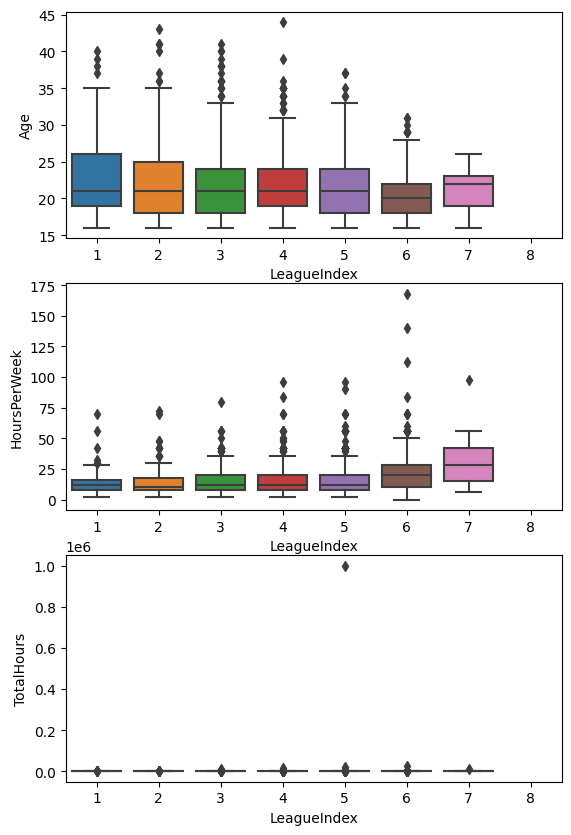

In [4]:
# create df with no null values (when LeagueIndex != 8)
spd = spd[(spd['GameID'] != 5255) & (spd['GameID'] != 1064)]
spd_nonull = spd.copy()
spd_nonull = spd_nonull[spd_nonull["LeagueIndex"] != 8]

# modifying 
spd_nonull['Age'] = spd_nonull["Age"].astype('int')
spd_nonull['TotalHours'] = spd_nonull['TotalHours'].astype('int')
spd_nonull['HoursPerWeek'] = spd_nonull['HoursPerWeek'].astype('int')
# Age BoxPlot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
sns.boxplot(data = spd_nonull, x = 'LeagueIndex', y = 'Age', ax = ax1)
sns.boxplot(data = spd_nonull, x = 'LeagueIndex', y = 'HoursPerWeek', ax = ax2)
sns.boxplot(data = spd_nonull, x = 'LeagueIndex', y = 'TotalHours', ax = ax3)
fig.set_figheight(10)


In [1]:
# This chart was created to supplement the poor boxplot 
spd_nonull[['LeagueIndex','TotalHours']].groupby('LeagueIndex').median()

NameError: name 'spd_nonull' is not defined

### Further Analysis on Features
Now that we did a heatmap and have a good idea on what features we want to incorporate, I want to see skew of the variabels present. For example the TotalHours looks like it has a large skew, as seen by the boxplot. This means that it may be best not to include it due to it not being distributed symmetrically. As you can see, with TotalHours being so heavily skewed, it would be wise to not have it in the final feature selection. 

In [22]:
skew = spd.skew(skipna = True).sort_values(ascending = False)
print(skew)

TotalHours              57.565346
MinimapAttacks           4.818069
ComplexAbilitiesUsed     3.779121
SelectByHotkeys          2.964916
HoursPerWeek             2.673157
MinimapRightClicks       2.562911
ComplexUnitsMade         2.301121
GapBetweenPACs           1.908300
WorkersMade              1.660736
ActionsInPAC             1.599767
APM                      1.203930
Age                      1.151892
ActionLatency            1.150983
AssignToHotkeys          1.142748
TotalMapExplored         0.630870
NumberOfPACs             0.550751
UniqueHotkeys            0.207371
UniqueUnitsMade          0.187984
GameID                  -0.009456
LeagueIndex             -0.162493
dtype: float32


In [25]:
skew = skew[abs(skew) > 0.75]
skew.shape[0]

14